In [101]:
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import cv2

In [80]:
dataset_path = "./dataset"
classes = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

In [82]:
# Load dataset
images = []
labels = []

for class_idx, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        # Skip non-image files
        if not image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            continue
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))  # Resize images to 128x128
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img_array)
        labels.append(class_idx)

/opt/anaconda3/lib/python3.12/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [83]:
# Convert to numpy arrays
images = np.array(images) / 255.0 
labels = np.array(labels)

In [84]:
# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training data: {X_train.shape}, Validation data: {X_val.shape}, Test data: {X_test.shape}")

Training data: (364, 128, 128, 3), Validation data: (78, 128, 128, 3), Test data: (78, 128, 128, 3)


In [85]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

In [86]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax') 
])

In [87]:
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [88]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,517,574 (24.86 MB)

 Trainable params: 6,517,574 (24.86 MB)

 Non-trainable params: 0 (0.00 B)

In [91]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=50
)

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 0.1841 - loss: 1.7513 - val_accuracy: 0.6795 - val_loss: 1.5309
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 216ms/step - accuracy: 0.4578 - loss: 1.5281 - val_accuracy: 0.5769 - val_loss: 1.2678
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step - accuracy: 0.4476 - loss: 1.3165 - val_accuracy: 0.4872 - val_loss: 1.1259
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - accuracy: 0.6174 - loss: 1.1718 - val_accuracy: 0.5513 - val_loss: 0.9985
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - accuracy: 0.6471 - loss: 1.0327 - val_accuracy: 0.6410 - val_loss: 0.8436
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - accuracy: 0.6624 - loss: 0.9504 - val_accuracy: 0.8077 - val_loss: 0.6679
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - accuracy: 0.6828 - loss: 0.8432 - val_accuracy: 0.8590 - val_loss: 0.5983
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.7656 - loss: 0.7531 - val_accuracy: 0.8590 - val_

In [97]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9651 - loss: 0.0521
Test Accuracy: 0.96


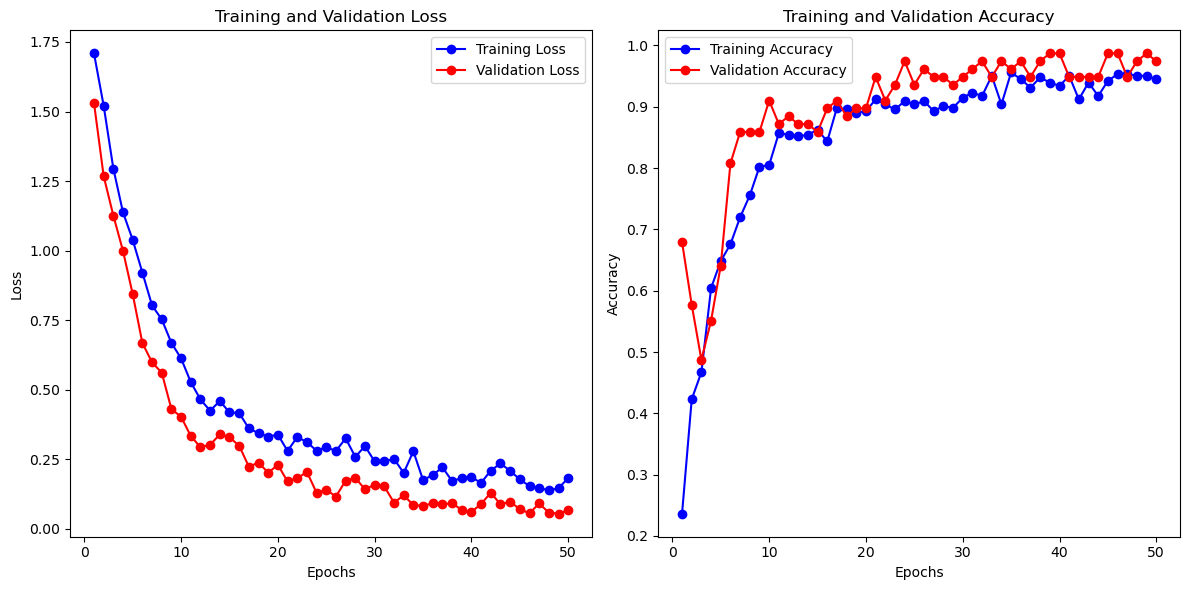

In [98]:
epochs = range(1, len(history.history['loss']) + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('Learning_Curve_CNN.png', dpi=300, bbox_inches='tight')
plt.show()

In [99]:
#Train with RandomForest and Decision Tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_flat, y_train)

# Validate Random Forest
rf_preds = rf_model.predict(X_val_flat)
rf_accuracy = accuracy_score(y_val, rf_preds)
print(f"Random Forest Validation Accuracy: {rf_accuracy:.4f}")

from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_flat, y_train)

# Validate Decision Tree
dt_preds = dt_model.predict(X_val_flat)
dt_accuracy = accuracy_score(y_val, dt_preds)
print(f"Decision Tree Validation Accuracy: {dt_accuracy:.4f}")


Random Forest Validation Accuracy: 0.8590
Decision Tree Validation Accuracy: 0.6538


In [100]:
#Feature Extraction + CNN
def extract_color_histogram(image, bins=(8, 8, 8)):
    hsv = cv2.cvtColor((image * 255).astype("uint8"), cv2.COLOR_RGB2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

# Extract features
X_train_hist = np.array([extract_color_histogram(img) for img in X_train])
X_val_hist = np.array([extract_color_histogram(img) for img in X_val])

# Combine with CNN features
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(classes), activation='softmax')
])

cnn_model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

history = cnn_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=1)
cnn_accuracy = cnn_model.evaluate(X_val, y_val, verbose=0)[1]
print(f"CNN Validation Accuracy (with feature extraction): {cnn_accuracy:.4f}")


Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.1865 - loss: 11.2656 - val_accuracy: 0.1923 - val_loss: 2.8074
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.3668 - loss: 2.4956 - val_accuracy: 0.5256 - val_loss: 1.2077
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.6753 - loss: 0.9407 - val_accuracy: 0.8462 - val_loss: 0.5644
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.8908 - loss: 0.4456 - val_accuracy: 0.7821 - val_loss: 0.5903
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.9393 - loss: 0.2536 - val_accuracy: 0.8462 - val_loss: 0.3534
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.9628 - loss: 0.1533 - val_accuracy: 0.9615 - val_loss: 0.1675
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.9818 - loss: 0.0985 - val_accuracy: 0.9359 - val_loss: 0.1630
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 1.0000 - loss: 0.0551 - val_accuracy: 0.9359 - val